# Import

In [211]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data

# create column names
cols = ['name','landmass','zone', 'area', 'population', 'language','religion','bars','stripes','colours',
'red','green','blue','gold','white','black','orange','mainhue','circles',
'crosses','saltires','quarters','sunstars','crescent','triangle','icon','animate','text','topleft','botright']

# create dataframe with column names from cols
df= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data", names = cols)

#variable names to use as predictors, 'mainhue' was removed because it is a list os objects
var = ['red', 'green', 'blue','gold', 'white', 'black', 'orange',
       'bars','stripes', 'circles','crosses', 'saltires',
       'quarters','sunstars','triangle','animate']

In [212]:
#Print number of countries by landmass, or continent
land_mass_flag_count = df['landmass'].value_counts()

# create dataframe of only Europe and Oceania
df_europe_oceania = df[(df['landmass'] == 3) | (df['landmass'] == 6)]

# print average values of var for df_europe_oceania
average_var = df_europe_oceania.groupby('landmass')[var].mean()
print(average_var)

               red  green      blue      gold     white     black    orange  \
landmass                                                                      
3         0.828571    0.2  0.514286  0.428571  0.771429  0.171429  0.057143   
6         0.800000    0.2  0.800000  0.600000  0.950000  0.150000  0.150000   

              bars   stripes   circles   crosses  saltires  quarters  \
landmass                                                               
3         0.628571  1.285714  0.028571  0.285714  0.028571  0.028571   
6         0.000000  0.400000  0.150000  0.400000  0.300000  0.400000   

          sunstars  triangle   animate  
landmass                                
3         0.142857  0.028571  0.114286  
6         3.300000  0.250000  0.300000  


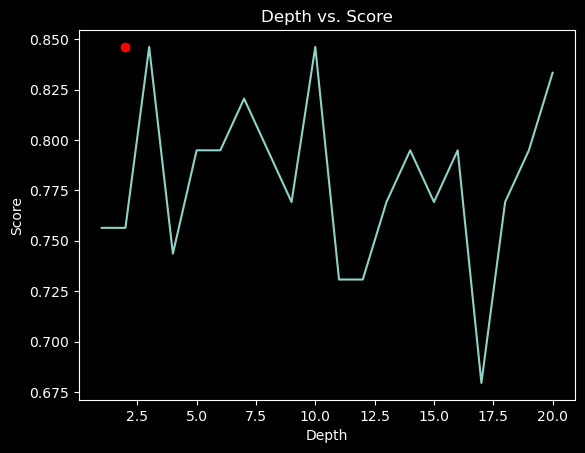

In [213]:
# copy dataframe
data = df.copy()

# get dummies on object columns
cols = ['mainhue', 'topleft', 'botright']
ohe = pd.get_dummies(df[cols])*1

# join to data
data = data.join(ohe)

#drop columns from cols list
data = data.drop(columns=cols)

# create predictors
X = data.drop(columns=['landmass', 'name'])

# create array of labels and convert to binary '*1'
labels = (df['landmass'].isin([3,6]))*1
#label_names = df[df['landmass'].isin([3,6])]

# split the dataG
x_train, x_test, y_train, y_test = train_test_split(X, labels, random_state=1, test_size=0.4)

# create empty list

acc_depth = []

# loop through different levels and append to list
for i in range(1,21):
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(x_train,y_train)
    score = dt.score(x_test,y_test)
    acc_depth.append(score)

# get max score
max_score = np.max(acc_depth)

# get index of max score, this is the max depth of the tree
best_depth = acc_depth.index(max_score)

# create x values for plot
x = [x for x in range(1,21)]
plt.plot(x, acc_depth)
plt.scatter(best_depth, max_score, color='red')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs. Score')
plt.show()

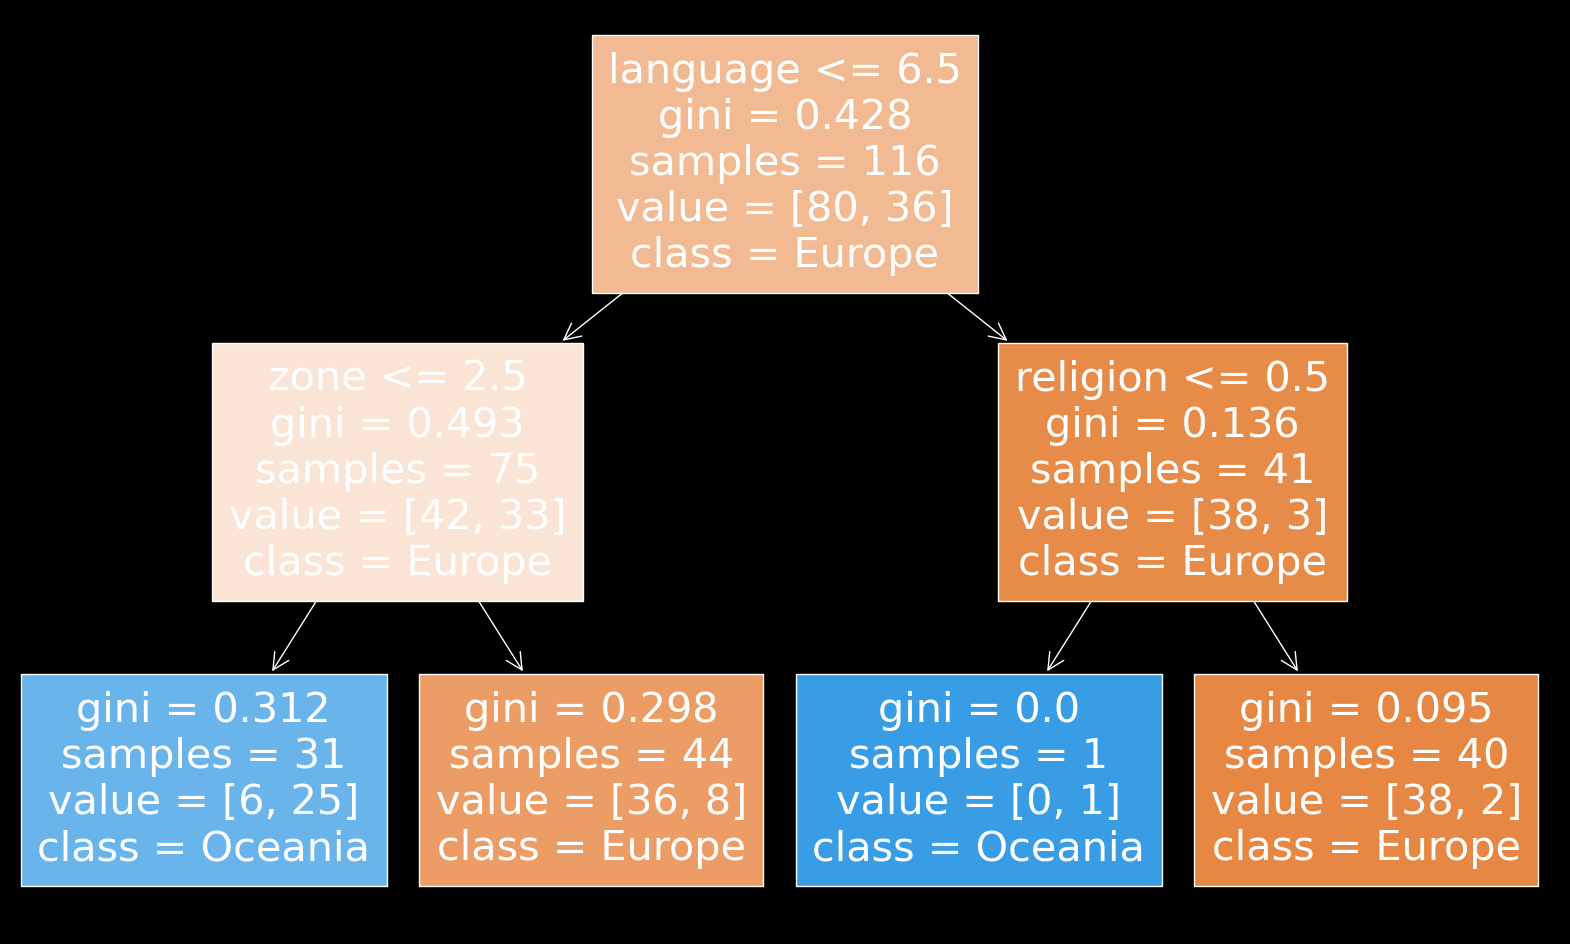

In [214]:
# Refit decision tree with max_depth
dt = DecisionTreeClassifier( random_state=1, max_depth= best_depth)
dt.fit(x_train, y_train)

# get list of feature names
feature_names = list(X.columns)

# plot the tree
plt.figure(figsize=(20,12))
tree.plot_tree(dt, filled=True, feature_names=feature_names, class_names = ['Europe', 'Oceania'])
plt.show()

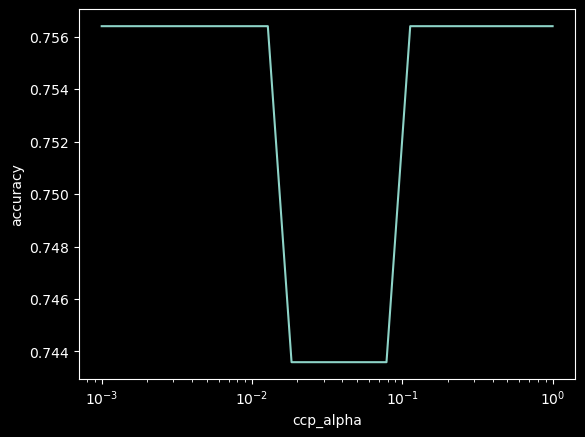

In [215]:
acc_pruned = []
ccp = np.logspace(-3, 0, num=20)
for i in ccp:
    dt_prune = DecisionTreeClassifier(random_state = 1, max_depth = best_depth, ccp_alpha=i)
    dt_prune.fit(x_train, y_train)
    acc_pruned.append(dt_prune.score(x_test, y_test))

plt.plot(ccp, acc_pruned)
plt.xscale('log')
plt.xlabel('ccp_alpha')
plt.ylabel('accuracy')
plt.show()

In [216]:
# get max score
largest_accuracy = np.max(acc_pruned)

# get index of max score, this is the max depth of the tree
best_alpha = acc_pruned.index(largest_accuracy)

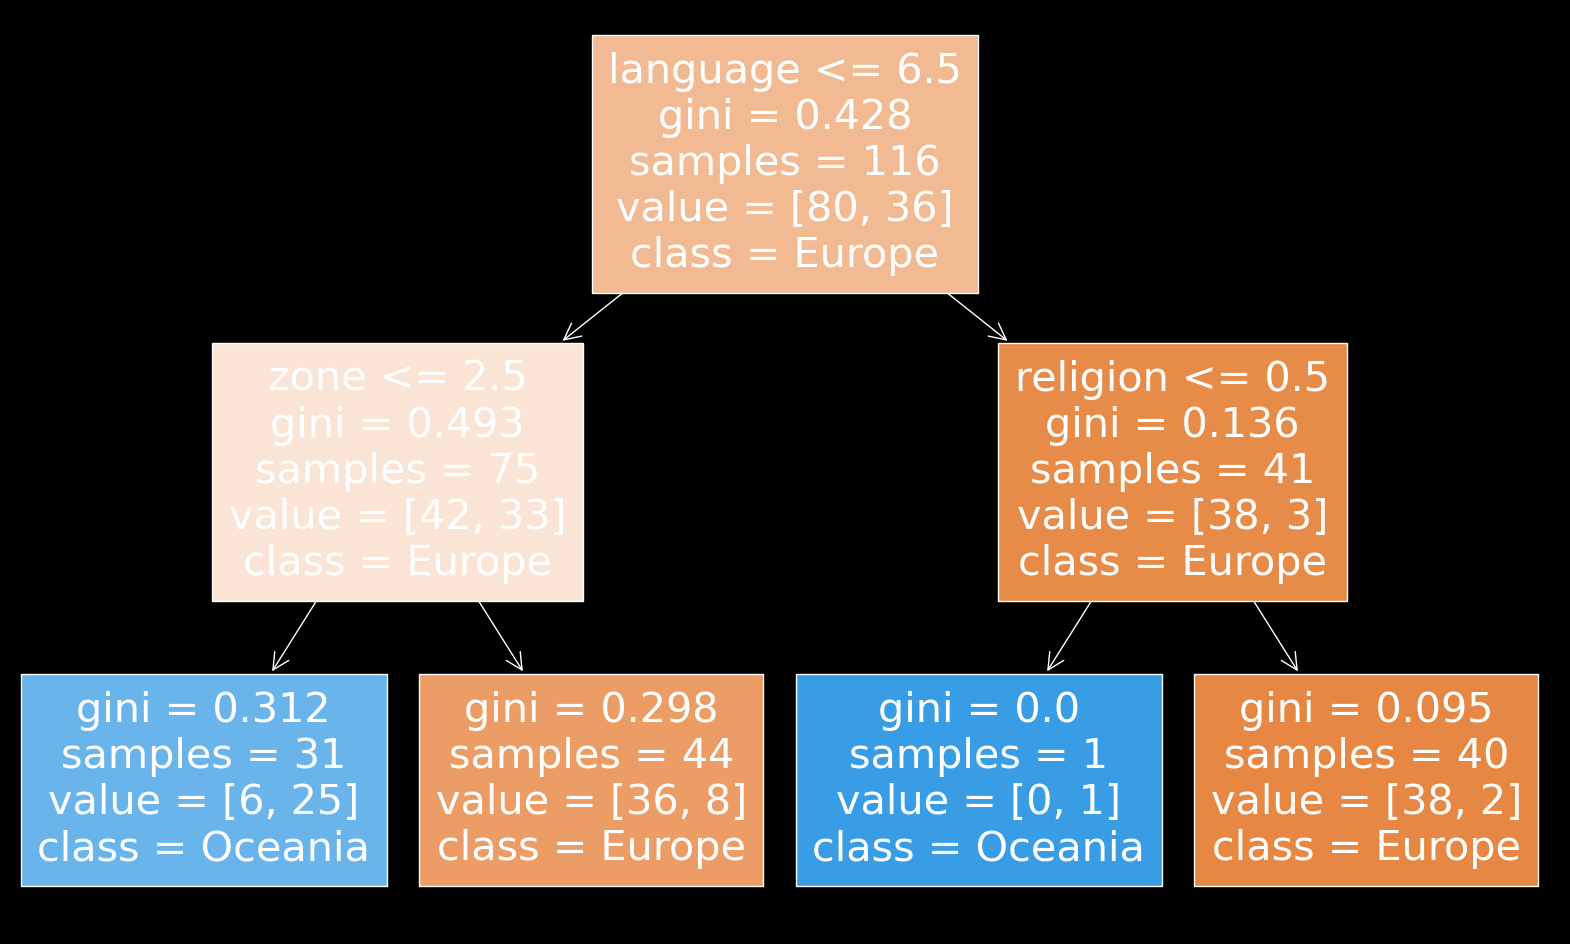

In [217]:
# Refit decision tree with max_depth and accuracy
dt_final = DecisionTreeClassifier(random_state=1, max_depth= best_depth, ccp_alpha=best_alpha)
dt_final.fit(x_train, y_train)

# get list of feature names
feature_names = list(X.columns)

# plot the tree
plt.figure(figsize=(20,12))
tree.plot_tree(dt_final, filled=True, feature_names=feature_names, class_names = ['Europe', 'Oceania'])
plt.show()